In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Gall_Bladder_Disorders_AI - sheet-1.csv')
df2=pd.read_csv('/content/drive/MyDrive/Test_data_version1.xlsx - Sheet1.csv')


df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [3]:
df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08
...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04


In [4]:
df2

,Patient_ID,Diabetes,High Blood pressure,Coronary Artery Disease,Arrhythmia,"Heart Failure- Dilated Cardiomyopathy, Restrictive Cardiomyopathy",Cholesterol disorders,Hypertriglyceridemia,"Thyroid Disorders- Hypothyroidism, Hyperthyroidism","Anemia- Microcytic, Hemolytic",...,Fatigue,"Mood Disorders- Anxiety, Schizophrenia, Depression",Urticaria,Essential tremors,Renal Disorders,"Sinusitis, Dust Allergy (Ciliary dykinesia, Hyper IgE syndrome, Angioedma, Chroinc granulomatous)",Obesity,Skin Health,Eye Health,Gastritis
0,KHAIGHGPPGX19,Moderate to High,Mild,-,-,-,Mild,Moderate,0,0,...,-,0,-,-,-,-,Mild,-,-,Mild
1,KHAIGHGPPGX22,Mild,Moderate,Mild,-,-,Moderate,Mild,Mild,0,...,-,0,-,-,-,-,Mild,-,-,Mild
2,KHAIGHGPTTL318,Mild to Moderate,Mild,Mild,-,-,Mild,Mild,Low to Mild,0,...,-,0,-,-,-,-,Low to Mild,-,-,Moderate
3,KHAIGHGPTTL319,Mild to Moderate,Mild to Moderate,Mild,-,-,Moderate,Moderate,Low to Mild,0,...,-,0,-,-,-,-,Moderate,-,-,Moderate
4,KHAIGHGPTTL321,Moderate to High,Mild,Mild,-,-,Mild to Moderate,Mild to Moderate,Low to Mild,0,...,-,0,-,-,-,-,Mild to Moderate,-,-,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KHAIGHGPTTL546,Mild,Mild,Mild,-,-,Mild,Moderate,0,0,...,-,Moderate,-,-,-,-,0,-,Mild,-
496,KHAIGHGPTTL548,Low,Moderate to High,Mild,-,-,Moderate,Mild,0,0,...,-,Moderate,-,-,-,-,Moderate,-,-,0
497,KHAIGHGPTTL551,Moderate,Mild,Mild,-,-,Moderate,Moderate,Mild,0,...,-,Moderate,-,-,-,-,Mild,-,-,Moderate
498,KHAIGHGPTTL553,Mild,Mild,Mild,-,-,Mild,Mild,Low,0,...,-,Moderate,-,-,-,-,Mild,-,-,Low to Mild


In [5]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


# SET 1

In [6]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [7]:
labels['new_labels'].value_counts()

,count
new_labels,
0,1508
1,349
2,293


In [8]:
labels2=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [9]:
labels2=labels2.drop(columns=['new_labels'])

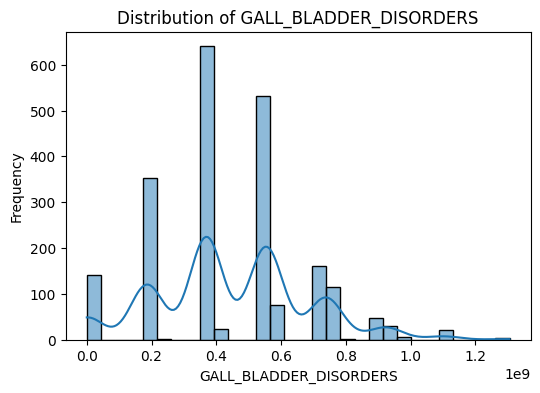

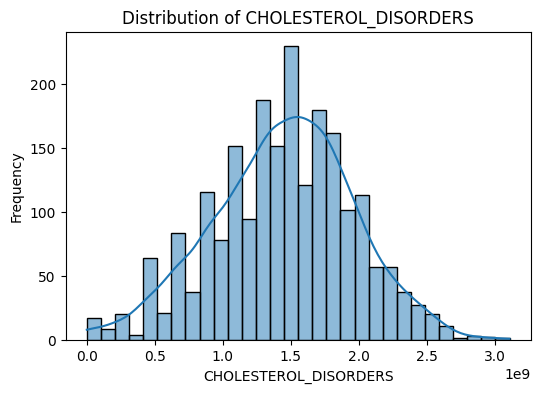

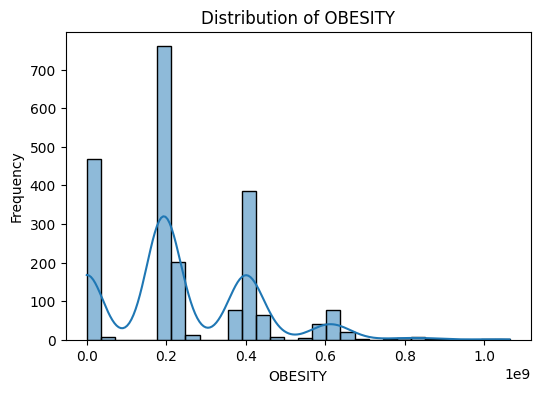

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns (excluding categorical ones)
numerical_cols = labels2.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms and KDE plots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(labels2[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [11]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [12]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [13]:
df_train

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,3.645107e+08,1.124426e+09,6.560451e+08,0,0
1679,KHTENTGPTTL16,5.770269e+08,1.549481e+09,3.643495e+08,0,0
1680,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
1681,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [14]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [15]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Gall bladder disorders'])

In [16]:
df_train_set1

,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,new_labels
0,1.093394e+09,1.549463e+09,2.130295e+08,2
1,5.465359e+08,2.837003e+09,2.128695e+08,2
2,7.287913e+08,1.792181e+09,1.823782e+08,0
3,3.646029e+08,1.276290e+09,2.008906e+08,0
4,5.465819e+08,1.306413e+09,6.074028e+08,0
...,...,...,...,...
1678,3.645107e+08,1.124426e+09,6.560451e+08,0
1679,5.770269e+08,1.549481e+09,3.643495e+08,0
1680,3.647641e+08,1.154046e+09,4.610059e+04,0
1681,0.000000e+00,0.000000e+00,5.378402e+04,1


In [17]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [18]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [19]:
y_train.value_counts()

,count
new_labels,
2,951
0,951
1,951


In [20]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [21]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [22]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [23]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [24]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [25]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


In [26]:
X_test.value_counts()

,,,count
GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,
3.645569e+08,1.519075e+09,6.258690e+08,2
0.000000e+00,9.220119e+04,2.124700e+08,1
5.740240e+08,8.890123e+08,5.776799e+08,1
5.657272e+08,1.915790e+09,2.002440e+08,1
5.659889e+08,1.882693e+09,2.431196e+08,1
...,...,...,...
3.758436e+08,2.079729e+09,6.139587e+08,1
3.761668e+08,1.490876e+09,4.019670e+08,1
3.765750e+08,1.611426e+09,4.134441e+08,1


# KNN

KNN Classifier Metrics:
Accuracy: 0.9957983193277311
Precision: 0.99581589958159
Recall: 0.9957983193277311
F1-score: 0.995798282160833
Confusion Matrix:
[[237   1   0]
 [  0 238   0]
 [  2   0 236]]


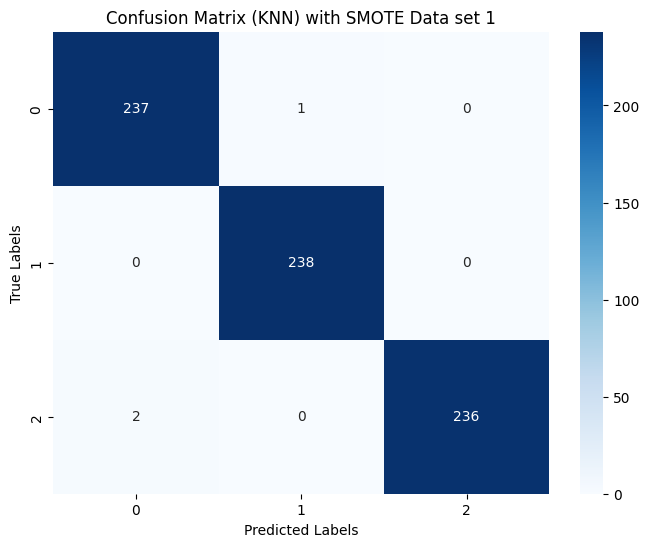

In [27]:

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Classifier Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (KNN) with SMOTE Data set 1")
plt.show()

Accuracy: 0.9994058229352347
Precision: 0.9994080483174997
Recall: 0.9994058229352347
F1-score: 0.9994062553399431
Confusion Matrix:
[[1188    1    0]
 [   0  266    0]
 [   0    0  228]]


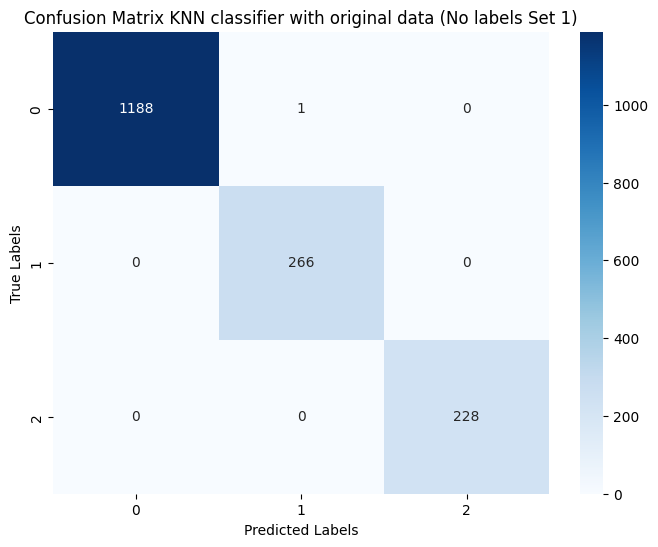

In [28]:
y_pred_train=knn.predict(x_train_valid_scaled)
accuracy = accuracy_score(y_train_valid, y_pred_train)
precision = precision_score(y_train_valid, y_pred_train, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_train_valid, y_pred_train, average='weighted')
f1 = f1_score(y_train_valid, y_pred_train, average='weighted')
conf_matrix = confusion_matrix(y_train_valid, y_pred_train)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN classifier with original data (No labels Set 1)")
plt.show()

Accuracy: 0.974304068522484
Precision: 0.9745807939383957
Recall: 0.974304068522484
F1-score: 0.9740730316711408
Confusion Matrix:
[[318   1   0]
 [  5  78   0]
 [  2   4  59]]


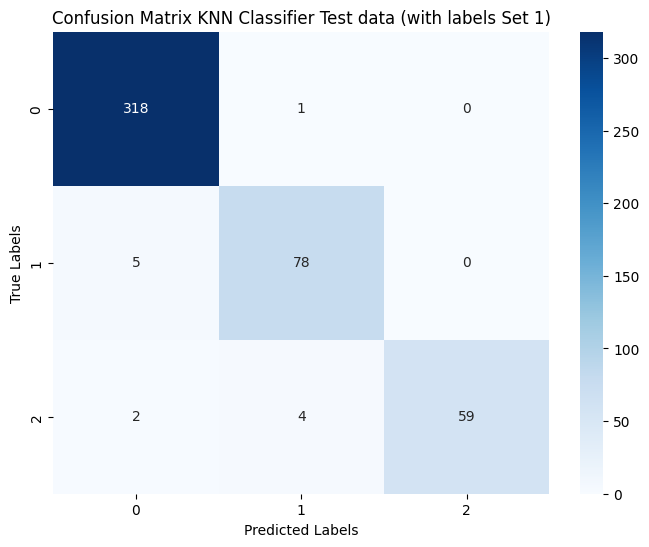

In [29]:
y_pred_test=knn.predict(x_test_valid_scaled)
accuracy = accuracy_score(y_test_valid, y_pred_test)
precision = precision_score(y_test_valid, y_pred_test, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test_valid, y_pred_test, average='weighted')
f1 = f1_score(y_test_valid, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test_valid, y_pred_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN Classifier Test data (with labels Set 1)")
plt.show()

In [30]:
import numpy as np # Assuming numpy is already imported in your code

unique, counts = np.unique(y_pred_test, return_counts=True)
# np.unique returns unique elements and their counts in the array

for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")
    # Prints each unique value and its count

# Alternatively, you can use pandas to count occurences of unique values:
import pandas as pd # Assuming pandas is already imported in your code
print(pd.Series(y_pred_test).value_counts())

Value: 0, Count: 325
Value: 1, Count: 83
Value: 2, Count: 59
0    325
1     83
2     59
Name: count, dtype: int64


In [31]:
x_test_valid_scaled

,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,0.139747,0.352212,0.171620
1,0.697643,0.556998,0.000217
2,0.279177,0.557278,0.444337
3,0.279107,0.361351,0.417354
4,0.441998,0.439592,0.055661
...,...,...,...
462,0.139571,0.488872,0.000282
463,0.139571,0.342134,0.371491
464,0.000106,0.273551,0.171634
465,0.418783,0.723234,0.200312


In [32]:
y_test_valid

,new_labels
0,0
1,0
2,0
3,0
4,0
...,...
462,0
463,0
464,0
465,1


In [33]:
total_test_org = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [34]:
total_test_org

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [35]:
# Merge df2 with total_test_org based on 'Patient_ID'
merged_df = total_test_org.merge(df2[['Patient_ID', 'Gall bladder disorders']], on='Patient_ID', how='left')
# Changed 'patient_id' to 'Patient_ID' to match the column name in df2 and total_test_org

# 'merged_df' now contains all columns from total_test_org and an additional 'GALL_BLADDER_DISORDERS' column

In [36]:
merged_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0
...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0


In [37]:
# Combine the new_labels column from y_test_valid with merged_df
# Combine the new_labels column from y_test_valid with merged_df
merged_df['new_labels'] = y_test_valid.reset_index(drop=True)

In [38]:
merged_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [39]:
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [40]:
import pandas as pd

# Assuming y_pred_test is your prediction array
y_pred_test_df = pd.DataFrame(y_pred_test, columns=['predicted_labels'])

# Display the resulting DataFrame
print(y_pred_test_df)


     predicted_labels
0                   0
1                   0
2                   1
3                   0
4                   0
..                ...
462                 0
463                 0
464                 0
465                 1
466                 0

[467 rows x 1 columns]


In [41]:
# Assuming `y_pred_test_df` and `merged_df` are defined
# Reset indices to ensure alignment if needed
y_pred_test_df.reset_index(drop=True, inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Add the `predicted_labels` column to `merged_df`
final_df = pd.concat([merged_df, y_pred_test_df], axis=1)

# Display the final DataFrame


In [42]:
final_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,1
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [43]:
# Get the top 20 rows of all columns
top_20_rows = final_df.head(20)

# Display the result
top_20_rows


,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,1
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
5,KHAIGHGPTTL352,3.646952e+08,1.548649e+09,6.425613e+05,-,0,0
6,KHAIGHGPTTL354,3.830000e+08,1.549581e+09,2.126082e+08,-,0,0
7,KHAIGHGPTTL355,9.220119e+04,6.680700e+08,6.146746e+04,-,0,0
8,KHAIGHGPTTL356,1.823015e+08,1.277008e+09,1.822861e+08,-,0,0
9,KHAIGHGPTTL359,1.825318e+08,7.290060e+08,2.125852e+08,-,0,0


In [44]:
# final_df.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_df_output_set1_knn.csv', index=False)


# EXTRA TREES

In [45]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [46]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [47]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [48]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [49]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [50]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Gall bladder disorders'])

In [51]:
df_train_set1

,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,new_labels
0,1.093394e+09,1.549463e+09,2.130295e+08,2
1,5.465359e+08,2.837003e+09,2.128695e+08,2
2,7.287913e+08,1.792181e+09,1.823782e+08,0
3,3.646029e+08,1.276290e+09,2.008906e+08,0
4,5.465819e+08,1.306413e+09,6.074028e+08,0
...,...,...,...,...
1678,3.645107e+08,1.124426e+09,6.560451e+08,0
1679,5.770269e+08,1.549481e+09,3.643495e+08,0
1680,3.647641e+08,1.154046e+09,4.610059e+04,0
1681,0.000000e+00,0.000000e+00,5.378402e+04,1


In [52]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [53]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [54]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [55]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [56]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [57]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [58]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


Extra Trees Classifier Metrics:
Accuracy: 0.9915966386554622
Precision: 0.9916310622421476
Recall: 0.9915966386554622
F1-score: 0.9915875887048159
Confusion Matrix:
[[236   1   1]
 [  0 238   0]
 [  2   2 234]]


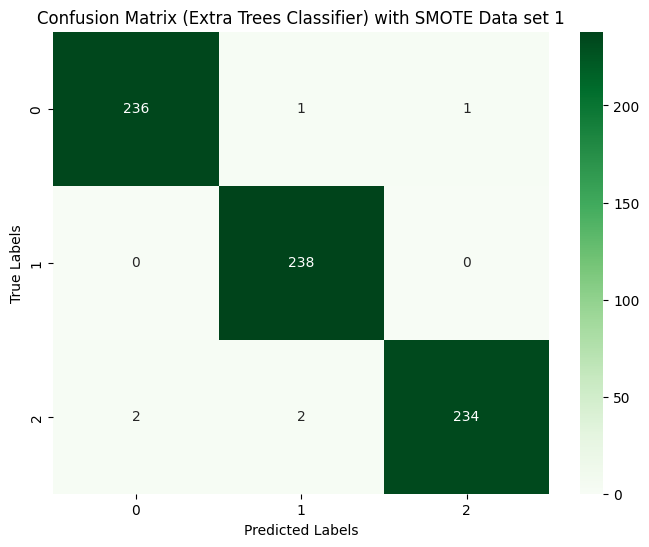

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    random_state=42
)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

# Evaluate the Extra Trees model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Print the evaluation metrics
print("Extra Trees Classifier Metrics:")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"F1-score: {f1_et}")
print(f"Confusion Matrix:\n{conf_matrix_et}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Extra Trees Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Extra Trees): 0.9982174688057041
Precision (Extra Trees): 0.9982191940389247
Recall (Extra Trees): 0.9982174688057041
F1-score (Extra Trees): 0.9982176512410962
Confusion Matrix (Extra Trees):
[[1187    1    1]
 [   0  266    0]
 [   1    0  227]]


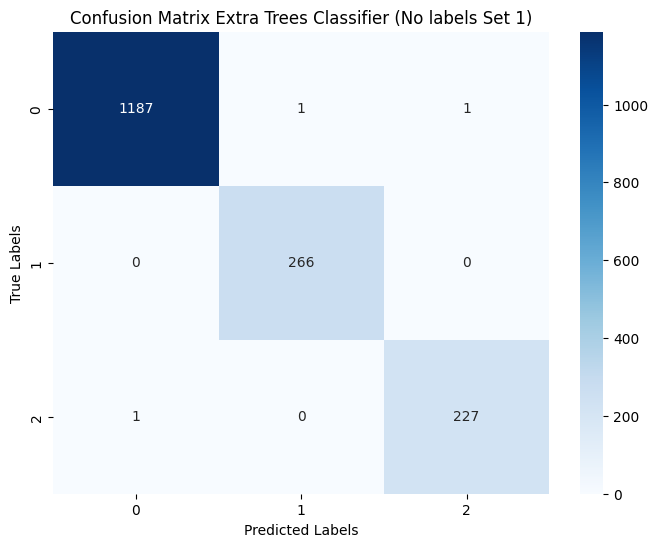

In [60]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Extra Trees Classifier
# et_classifier = ExtraTreesClassifier(
#     n_estimators=200,
#     max_depth=30,
#     min_samples_split=2,
#     random_state=42
# )

# # Fit the model on training data
# et_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_et = et_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_train_valid, y_pred_train_et)
precision_et = precision_score(y_train_valid, y_pred_train_et, average='weighted')  # Use 'weighted' for multi-class
recall_et = recall_score(y_train_valid, y_pred_train_et, average='weighted')
f1_et = f1_score(y_train_valid, y_pred_train_et, average='weighted')
conf_matrix_et = confusion_matrix(y_train_valid, y_pred_train_et)

# Print metrics
print(f"Accuracy (Extra Trees): {accuracy_et}")
print(f"Precision (Extra Trees): {precision_et}")
print(f"Recall (Extra Trees): {recall_et}")
print(f"F1-score (Extra Trees): {f1_et}")
print(f"Confusion Matrix (Extra Trees):\n{conf_matrix_et}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier (No labels Set 1)")
plt.show()


Accuracy (Extra Trees Test): 0.961456102783726
Precision (Extra Trees Test): 0.9626980055206891
Recall (Extra Trees Test): 0.961456102783726
F1-score (Extra Trees Test): 0.9606399776142456
Confusion Matrix (Extra Trees Test):
[[319   0   0]
 [  9  74   0]
 [  7   2  56]]


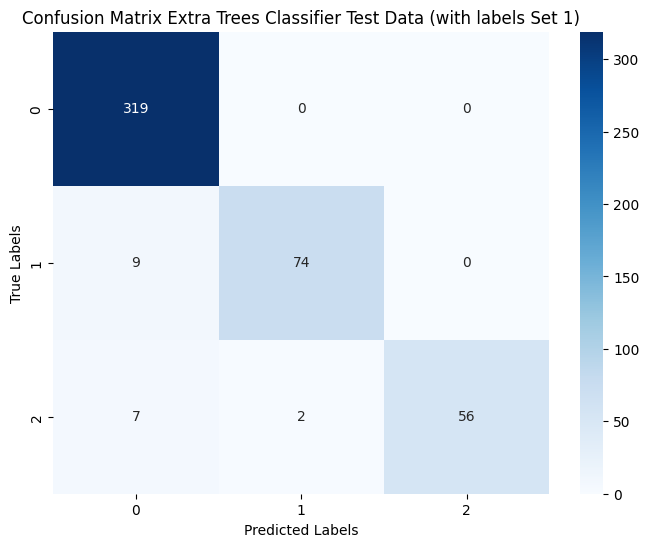

In [61]:
# Predict on test data
y_pred_test_et = et_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_et_test = accuracy_score(y_test_valid, y_pred_test_et)
precision_et_test = precision_score(y_test_valid, y_pred_test_et, average='weighted')  # Use 'weighted' for multi-class
recall_et_test = recall_score(y_test_valid, y_pred_test_et, average='weighted')
f1_et_test = f1_score(y_test_valid, y_pred_test_et, average='weighted')
conf_matrix_et_test = confusion_matrix(y_test_valid, y_pred_test_et)

# Print metrics
print(f"Accuracy (Extra Trees Test): {accuracy_et_test}")
print(f"Precision (Extra Trees Test): {precision_et_test}")
print(f"Recall (Extra Trees Test): {recall_et_test}")
print(f"F1-score (Extra Trees Test): {f1_et_test}")
print(f"Confusion Matrix (Extra Trees Test):\n{conf_matrix_et_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier Test Data (with labels Set 1)")
plt.show()


In [62]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [63]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [64]:
# Merge df2 with total_test_org based on 'Patient_ID'
merged_df = df_test.merge(df2[['Patient_ID', 'Gall bladder disorders']], on='Patient_ID', how='left')
# Changed 'patient_id' to 'Patient_ID' to match the column name in df2 and total_test_org

# 'merged_df' now contains all columns from total_test_org and an additional 'GALL_BLADDER_DISORDERS' column

In [65]:
merged_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0
...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0


In [66]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [67]:
# Select the required columns from the labels dataset
new_labels_df = labels[['Patient_ID', 'new_labels']]

# Merge the new_labels column with merge_df on patient_id
final_merged_df = merged_df.merge(new_labels_df, on='Patient_ID', how='inner')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  
0  1.824242e+08                      0           0  
1  2.305030e+05                      0           0  
2  4.723112e+08            Low to Mild           0  
3  4.436289e+08                      -           0  
4  5.916564e+07                      0           0  


In [68]:
merged_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0
...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0


In [69]:
 y_pred_test_et

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [70]:
import pandas as pd

# Convert the array into a DataFrame
y_pred_test_et_df = pd.DataFrame({
    'predicted_labels_et': y_pred_test_et  # Array of predictions
})

# Reset the index of both DataFrames to align the rows
final_merged_df = final_merged_df.reset_index(drop=True)
y_pred_test_et_df = y_pred_test_et_df.reset_index(drop=True)

# Concatenate the DataFrame with the predictions
final_merged_extra_set1= pd.concat([final_merged_df, y_pred_test_et_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_extra_set1.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  predicted_labels_et  
0  1.824242e+08                      0           0                    0  
1  2.305030e+05                      0           0                    0  
2  4.723112e+08            Low to Mild           0                    0  
3  4.436289e+08                      -           0                    0  
4  5.916564e+07                      0           0                    0  


In [71]:
final_merged_extra_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_et
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [72]:
# final_merged_extra_set1.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_extra_set1.csv', index=False)


# LightGBM

In [73]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [74]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [75]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [76]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [77]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Gall bladder disorders'])

In [78]:
scaler=StandardScaler()
smote=SMOTE()
test_split=0.2

In [79]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [80]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [81]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [82]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [83]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [84]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2853, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

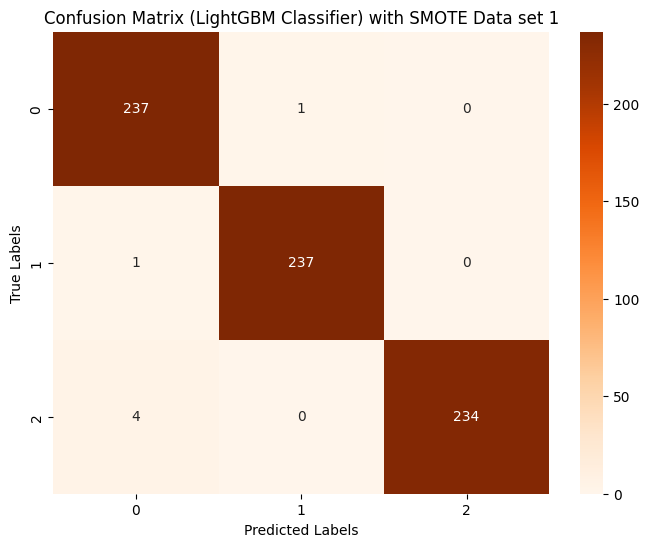

In [85]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# LightGBM Classifier
lgbm_classifier = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

# Train the classifier
lgbm_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_lgbm = lgbm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Print the evaluation metrics
print("LightGBM Classifier Metrics:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-score: {f1_lgbm}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (LightGBM Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (LightGBM): 0.9982174688057041
Precision (LightGBM): 0.9982184674226198
Recall (LightGBM): 0.9982174688057041
F1-score (LightGBM): 0.9982171905026292
Confusion Matrix (LightGBM):
[[1188    1    0]
 [   1  265    0]
 [   1    0  227]]


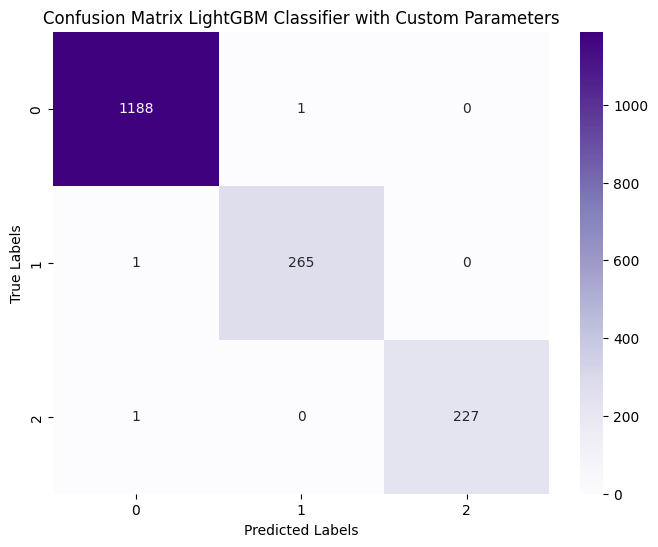

In [86]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize LightGBM Classifier with specific parameters
# lgbm_classifier = LGBMClassifier(
#     n_estimators=100,     # Number of trees
#     learning_rate=0.2,    # Learning rate
#     max_depth=7,          # Maximum depth of trees
#     random_state=42       # Ensures reproducibility
# )

# # Fit the model on training data
# lgbm_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_lgbm = lgbm_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_train_valid, y_pred_train_lgbm)
precision_lgbm = precision_score(y_train_valid, y_pred_train_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm = recall_score(y_train_valid, y_pred_train_lgbm, average='weighted')
f1_lgbm = f1_score(y_train_valid, y_pred_train_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_train_valid, y_pred_train_lgbm)

# Print metrics
print(f"Accuracy (LightGBM): {accuracy_lgbm}")
print(f"Precision (LightGBM): {precision_lgbm}")
print(f"Recall (LightGBM): {recall_lgbm}")
print(f"F1-score (LightGBM): {f1_lgbm}")
print(f"Confusion Matrix (LightGBM):\n{conf_matrix_lgbm}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier with Custom Parameters")
plt.show()


Accuracy (LightGBM Test): 0.9528907922912205
Precision (LightGBM Test): 0.9533825045602348
Recall (LightGBM Test): 0.9528907922912205
F1-score (LightGBM Test): 0.9518763989463241
Confusion Matrix (LightGBM Test):
[[317   2   0]
 [  7  75   1]
 [  6   6  53]]


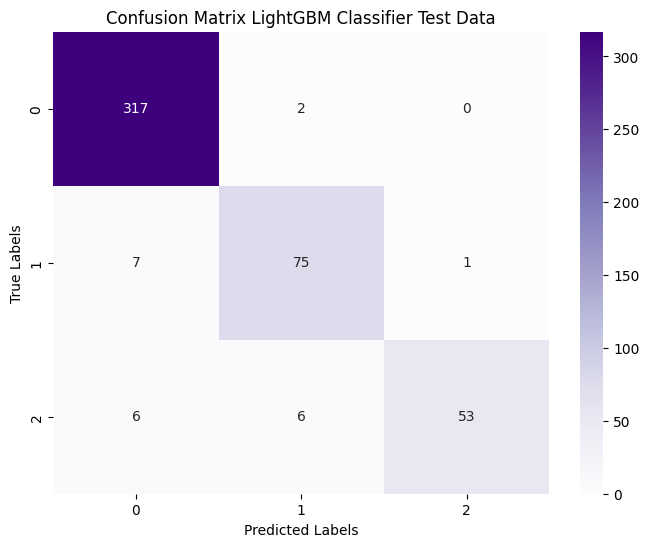

In [87]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize LightGBM Classifier with specified parameters
# lgbm_classifier = LGBMClassifier(
#     n_estimators=100,     # Number of boosting rounds
#     learning_rate=0.2,    # Learning rate
#     max_depth=7,          # Maximum depth of trees
#     random_state=42       # Ensures reproducibility
# )

# # Fit the model on training data
# lgbm_classifier.fit(x_train_valid_scaled, y_train_valid)

# # Predict on test data
y_pred_test_lgbm = lgbm_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_lgbm_test = accuracy_score(y_test_valid, y_pred_test_lgbm)
precision_lgbm_test = precision_score(y_test_valid, y_pred_test_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm_test = recall_score(y_test_valid, y_pred_test_lgbm, average='weighted')
f1_lgbm_test = f1_score(y_test_valid, y_pred_test_lgbm, average='weighted')
conf_matrix_lgbm_test = confusion_matrix(y_test_valid, y_pred_test_lgbm)

# Print metrics
print(f"Accuracy (LightGBM Test): {accuracy_lgbm_test}")
print(f"Precision (LightGBM Test): {precision_lgbm_test}")
print(f"Recall (LightGBM Test): {recall_lgbm_test}")
print(f"F1-score (LightGBM Test): {f1_lgbm_test}")
print(f"Confusion Matrix (LightGBM Test):\n{conf_matrix_lgbm_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier Test Data")
plt.show()


In [88]:
y_pred_test_lgbm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [89]:
final_merged_LightGBM_set1=final_merged_extra_set1.copy()

In [90]:
final_merged_LightGBM_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_et
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [91]:
final_merged_LightGBM_set1 = final_merged_LightGBM_set1.drop(columns=['predicted_labels_et'])


In [92]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_lgbm_df = pd.DataFrame({
    'predicted_labels_lgbm': y_pred_test_lgbm  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_LightGBM_set1 = final_merged_LightGBM_set1.reset_index(drop=True)
y_pred_test_lgbm_df = y_pred_test_lgbm_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_LightGBM_set1 = pd.concat([final_merged_LightGBM_set1, y_pred_test_lgbm_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_LightGBM_set1.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  predicted_labels_lgbm  
0  1.824242e+08                      0           0                      0  
1  2.305030e+05                      0           0                      0  
2  4.723112e+08            Low to Mild           0                      0  
3  4.436289e+08                      -           0                      0  
4  5.916564e+07                      0           0                      0  


In [93]:
final_merged_LightGBM_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_lgbm
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [94]:
# final_merged_LightGBM_set1.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_LightGBM_set1.csv', index=False)


# Gradient Boosting

In [95]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [96]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [97]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [98]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [99]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Gall bladder disorders'])

In [100]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [101]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [102]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [103]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [104]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [105]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [106]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


Gradient Boosting Classifier Metrics:
Accuracy: 0.9859943977591037
Precision: 0.9860525566158667
Recall: 0.9859943977591037
F1-score: 0.9860118791085807
Confusion Matrix:
[[234   3   1]
 [  3 235   0]
 [  3   0 235]]


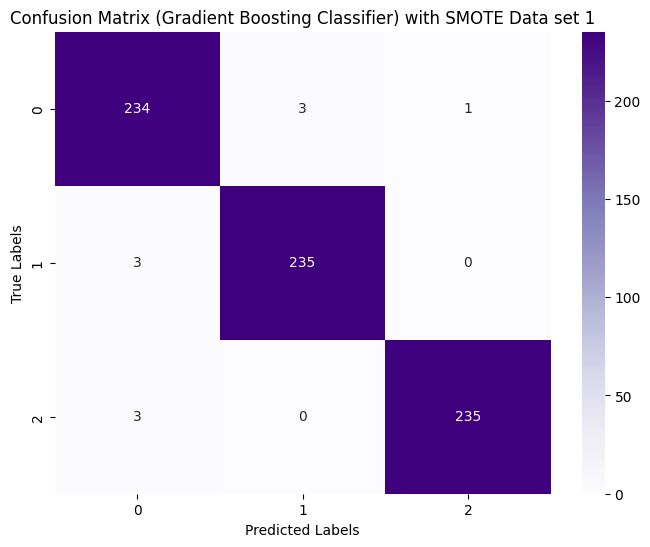

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

# Train the classifier
gb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print the evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Gradient Boosting Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Gradient Boosting): 0.9952465834818776
Precision (Gradient Boosting): 0.9952506421085636
Recall (Gradient Boosting): 0.9952465834818776
F1-score (Gradient Boosting): 0.9952474116032223
Confusion Matrix (Gradient Boosting):
[[1185    3    1]
 [   2  264    0]
 [   2    0  226]]


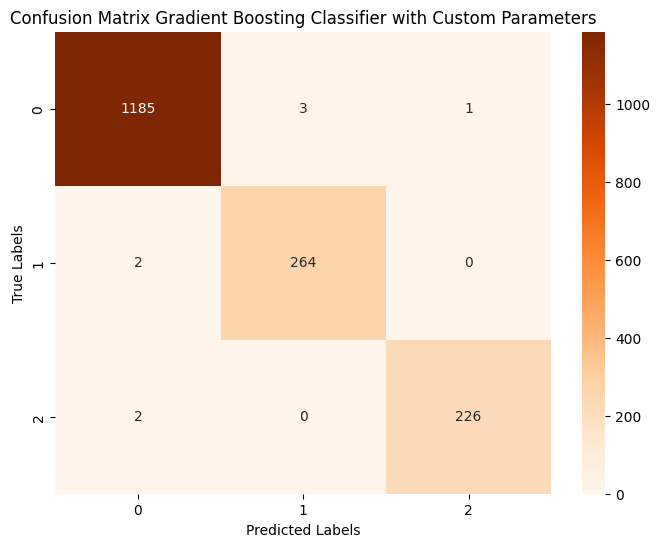

In [108]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Gradient Boosting Classifier with specific parameters
# gb_classifier = GradientBoostingClassifier(
#     n_estimators=50,     # Number of boosting stages
#     learning_rate=0.2,   # Learning rate
#     max_depth=7,         # Maximum depth of individual trees
#     random_state=42      # Ensures reproducibility
# )

# # Fit the model on training data
# gb_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_gb = gb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_train_valid, y_pred_train_gb)
precision_gb = precision_score(y_train_valid, y_pred_train_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb = recall_score(y_train_valid, y_pred_train_gb, average='weighted')
f1_gb = f1_score(y_train_valid, y_pred_train_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_train_valid, y_pred_train_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting): {accuracy_gb}")
print(f"Precision (Gradient Boosting): {precision_gb}")
print(f"Recall (Gradient Boosting): {recall_gb}")
print(f"F1-score (Gradient Boosting): {f1_gb}")
print(f"Confusion Matrix (Gradient Boosting):\n{conf_matrix_gb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier with Custom Parameters")
plt.show()


Accuracy (Gradient Boosting Test): 0.9507494646680942
Precision (Gradient Boosting Test): 0.9515642106844929
Recall (Gradient Boosting Test): 0.9507494646680942
F1-score (Gradient Boosting Test): 0.9496934271489975
Confusion Matrix (Gradient Boosting Test):
[[316   2   1]
 [  7  76   0]
 [  6   7  52]]


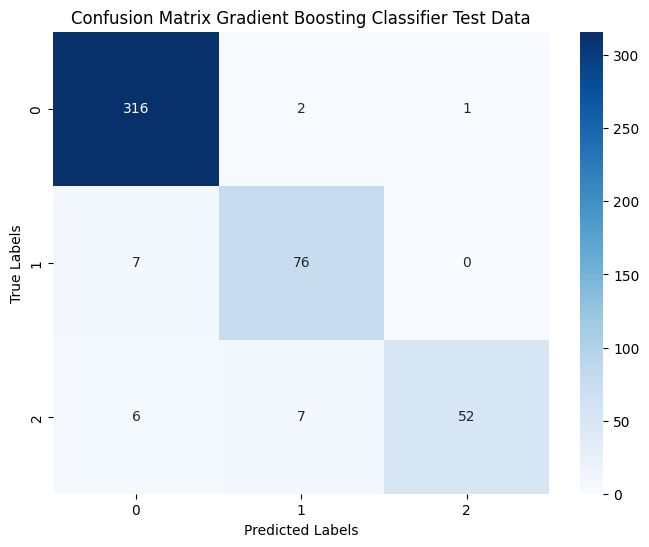

In [109]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Gradient Boosting Classifier with specified parameters
# gb_classifier = GradientBoostingClassifier(
#     n_estimators=50,     # Number of boosting stages
#     learning_rate=0.2,   # Learning rate
#     max_depth=7,         # Maximum depth of individual trees
#     random_state=42      # Ensures reproducibility
# )

# # Fit the model on training data
# gb_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on test data
y_pred_test_gb = gb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_gb_test = accuracy_score(y_test_valid, y_pred_test_gb)
precision_gb_test = precision_score(y_test_valid, y_pred_test_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb_test = recall_score(y_test_valid, y_pred_test_gb, average='weighted')
f1_gb_test = f1_score(y_test_valid, y_pred_test_gb, average='weighted')
conf_matrix_gb_test = confusion_matrix(y_test_valid, y_pred_test_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting Test): {accuracy_gb_test}")
print(f"Precision (Gradient Boosting Test): {precision_gb_test}")
print(f"Recall (Gradient Boosting Test): {recall_gb_test}")
print(f"F1-score (Gradient Boosting Test): {f1_gb_test}")
print(f"Confusion Matrix (Gradient Boosting Test):\n{conf_matrix_gb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier Test Data")
plt.show()


In [110]:
y_pred_test_gb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [111]:
final_merged_GB_set1=final_merged_extra_set1.copy()

In [112]:
final_merged_GB_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_et
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [113]:
final_merged_GB_set1 = final_merged_GB_set1.drop(columns=['predicted_labels_et'])


In [114]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_gb_df = pd.DataFrame({
    'y_pred_test_gb': y_pred_test_gb  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_GB_set1 = final_merged_GB_set1.reset_index(drop=True)
y_pred_test_gb_df=y_pred_test_gb_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_GB_set1 = pd.concat([final_merged_GB_set1, y_pred_test_gb_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_GB_set1.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  y_pred_test_gb  
0  1.824242e+08                      0           0               0  
1  2.305030e+05                      0           0               0  
2  4.723112e+08            Low to Mild           0               0  
3  4.436289e+08                      -           0               0  
4  5.916564e+07                      0           0               0  


In [115]:
final_merged_GB_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test_gb
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [116]:
# final_merged_GB_set1.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_GB_set1.csv', index=False)


# Decision Tree

# New section

In [117]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [118]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [119]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [120]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [121]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Gall bladder disorders'])

In [122]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [123]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [124]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [125]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [126]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [127]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [128]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


Decision Tree Classifier Metrics:
Accuracy: 0.9831932773109243
Precision: 0.9832160265236038
Recall: 0.9831932773109243
F1-score: 0.9831930795021607
Confusion Matrix:
[[233   4   1]
 [  0 235   3]
 [  3   1 234]]


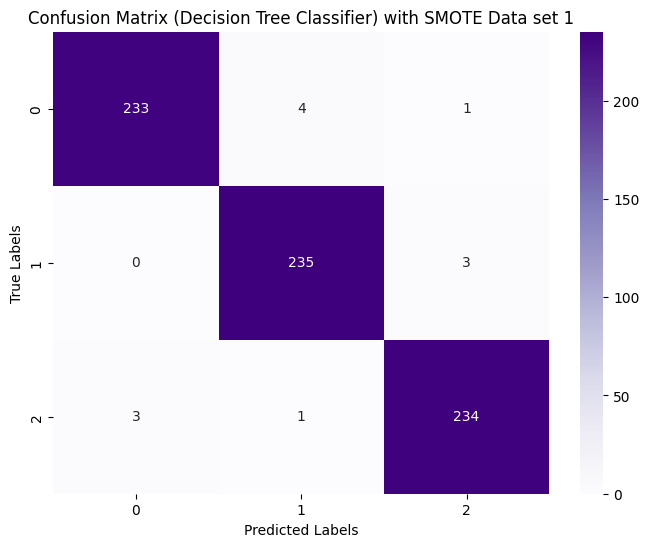

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Decision Tree Classifier with specified parameters
dt_classifier = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the classifier
dt_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print the evaluation metrics
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Decision Tree): 0.9928698752228164
Precision (Decision Tree): 0.9928865376879563
Recall (Decision Tree): 0.9928698752228164
F1-score (Decision Tree): 0.9928751584566088
Confusion Matrix (Decision Tree):
[[1183    4    2]
 [   2  262    2]
 [   2    0  226]]


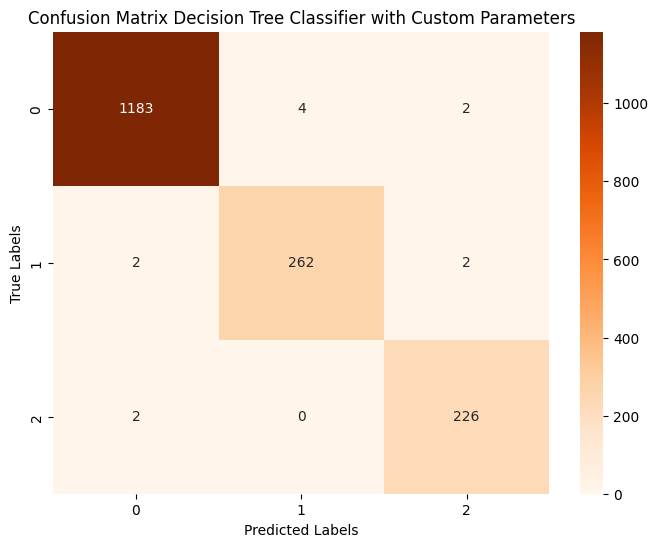

In [130]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Decision Tree Classifier with specific parameters
# dt_classifier = DecisionTreeClassifier(
#     max_depth=10,           # Maximum depth of the tree
#     min_samples_split=2,    # Minimum number of samples required to split an internal node
#     min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
#     random_state=42         # Ensures reproducibility
# )

# # Fit the model on training data
# dt_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_dt = dt_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_train_valid, y_pred_train_dt)
precision_dt = precision_score(y_train_valid, y_pred_train_dt, average='weighted')  # Use 'weighted' for multi-class
recall_dt = recall_score(y_train_valid, y_pred_train_dt, average='weighted')
f1_dt = f1_score(y_train_valid, y_pred_train_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_train_valid, y_pred_train_dt)

# Print metrics
print(f"Accuracy (Decision Tree): {accuracy_dt}")
print(f"Precision (Decision Tree): {precision_dt}")
print(f"Recall (Decision Tree): {recall_dt}")
print(f"F1-score (Decision Tree): {f1_dt}")
print(f"Confusion Matrix (Decision Tree):\n{conf_matrix_dt}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Decision Tree Classifier with Custom Parameters")
plt.show()


Accuracy (Decision Tree Test): 0.9486081370449678
Precision (Decision Tree Test): 0.9487174162429546
Recall (Decision Tree Test): 0.9486081370449678
F1-score (Decision Tree Test): 0.9473820599352782
Confusion Matrix (Decision Tree Test):
[[316   1   2]
 [  8  75   0]
 [  7   6  52]]


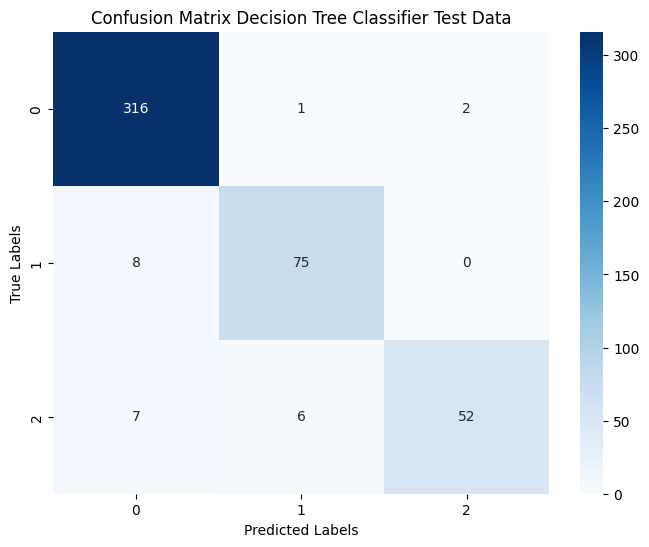

In [131]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Decision Tree Classifier with specified parameters
# dt_classifier = DecisionTreeClassifier(
#     max_depth=10,           # Maximum depth of the tree
#     min_samples_split=2,    # Minimum number of samples required to split an internal node
#     min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
#     random_state=42         # Ensures reproducibility
# )

# # Fit the model on training data
# dt_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on test data
y_pred_test_dt = dt_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_dt_test = accuracy_score(y_test_valid, y_pred_test_dt)
precision_dt_test = precision_score(y_test_valid, y_pred_test_dt, average='weighted')  # Use 'weighted' for multi-class
recall_dt_test = recall_score(y_test_valid, y_pred_test_dt, average='weighted')
f1_dt_test = f1_score(y_test_valid, y_pred_test_dt, average='weighted')
conf_matrix_dt_test = confusion_matrix(y_test_valid, y_pred_test_dt)

# Print metrics
print(f"Accuracy (Decision Tree Test): {accuracy_dt_test}")
print(f"Precision (Decision Tree Test): {precision_dt_test}")
print(f"Recall (Decision Tree Test): {recall_dt_test}")
print(f"F1-score (Decision Tree Test): {f1_dt_test}")
print(f"Confusion Matrix (Decision Tree Test):\n{conf_matrix_dt_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Decision Tree Classifier Test Data")
plt.show()


In [132]:
y_pred_test_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,

In [133]:
final_merged_DT_set1=final_merged_extra_set1.copy()

In [134]:
final_merged_DT_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_et
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [135]:
final_merged_DT_set1 = final_merged_DT_set1.drop(columns=['predicted_labels_et'])


In [136]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_dt_df = pd.DataFrame({
    'y_pred_test_dt': y_pred_test_dt  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_DT_set1 = final_merged_DT_set1.reset_index(drop=True)
y_pred_test_dt_df=y_pred_test_dt_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_DT_set1 = pd.concat([final_merged_DT_set1, y_pred_test_dt_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_DT_set1.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  y_pred_test_dt  
0  1.824242e+08                      0           0               0  
1  2.305030e+05                      0           0               0  
2  4.723112e+08            Low to Mild           0               0  
3  4.436289e+08                      -           0               0  
4  5.916564e+07                      0           0               0  


In [137]:
final_merged_DT_set1

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test_dt
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [138]:
# final_merged_DT_set1.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_DT_set1.csv', index=False)


# Stacked model

In [149]:
# prompt: create a pickle file by integrating the above two models stacked with scaler_stacked , on giving input to the pickle file it should transofmr data itself and giv eoutput
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()

# Create the stacking classifier
stacked_model = StackingClassifier(
    estimators=[("lgbm_classifier",lgbm_classifier), (" et_classifier",  et_classifier), ("knn",knn), ('gb_classifier',gb_classifier)],
    final_estimator=meta_model
)

# Create a pipeline that integrates scaling and stacking
pipeline = Pipeline([
    ("scaler", scaler),  # First step: Scaling
    ("stacked_model", stacked_model)  # Second step: Stacked Model
])

# Train the pipeline
pipeline.fit(X_train, y_train)
filename = '/content/drive/MyDrive/GALL BLADDERS/stacked_model_mood_disorders.pkl'

# Save the pipeline to a pickle file
with open(filename, "wb") as f:
    pickle.dump(pipeline, f)

print(f"Model saved successfully as {filename}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2853, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2282, number of used features: 3
[LightGBM] [Info] Start training from score -1.098174
[LightGBM] [Info] Start training from score -1.098174
[LightGBM] [Info] Start training from score -1.099489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2282, number of used features: 3
[LightGBM] [Info] Start training from score -1.098174
[LightGBM] [Info] Start training from score -1.099489
[LightGBM] [Info] Start training from score -1.098174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model saved successfully as /content/drive/MyDrive/GALL BLADDERS/stacked_model_mood_disorders.pkl


In [150]:
x_train_valid

,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,1.093394e+09,1.549463e+09,2.130295e+08
1,5.465359e+08,2.837003e+09,2.128695e+08
2,7.287913e+08,1.792181e+09,1.823782e+08
3,3.646029e+08,1.276290e+09,2.008906e+08
4,5.465819e+08,1.306413e+09,6.074028e+08
...,...,...,...
1678,3.645107e+08,1.124426e+09,6.560451e+08
1679,5.770269e+08,1.549481e+09,3.643495e+08
1680,3.647641e+08,1.154046e+09,4.610059e+04
1681,0.000000e+00,0.000000e+00,5.378402e+04


In [151]:
with open(filename, "rb") as f:
    loaded_pipeline = pickle.load(f)


predictions = loaded_pipeline.predict(x_train_valid)
accuracy=accuracy_score(y_train_valid, predictions)
from sklearn.metrics import classification_report
report=classification_report(y_train_valid,predictions)
print(classification_report)
print(f"Accuracy: {accuracy}")
print("Predictions:", predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<function classification_report at 0x7ad6f67794e0>
Accuracy: 0.9976232917409388
Predictions: [2 2 0 ... 0 1 0]


In [152]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1189\n           1       1.00      0.99      0.99       266\n           2       1.00      1.00      1.00       228\n\n    accuracy                           1.00      1683\n   macro avg       1.00      1.00      1.00      1683\nweighted avg       1.00      1.00      1.00      1683\n'

In [153]:
# Example usage after saving the model:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Example data (replace with your actual data)
# Assuming 'x_test_valid' is the same as the original one
new_data = x_test_valid.iloc[:5] # sample input

predictions = loaded_model.predict(new_data)
predictions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([0, 0, 0, 0, 0])

In [154]:
y_test_valid

,new_labels
0,0
1,0
2,0
3,0
4,0
...,...
462,0
463,0
464,0
465,1


In [156]:
x_train_valid

,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,1.093394e+09,1.549463e+09,2.130295e+08
1,5.465359e+08,2.837003e+09,2.128695e+08
2,7.287913e+08,1.792181e+09,1.823782e+08
3,3.646029e+08,1.276290e+09,2.008906e+08
4,5.465819e+08,1.306413e+09,6.074028e+08
...,...,...,...
1678,3.645107e+08,1.124426e+09,6.560451e+08
1679,5.770269e+08,1.549481e+09,3.643495e+08
1680,3.647641e+08,1.154046e+09,4.610059e+04
1681,0.000000e+00,0.000000e+00,5.378402e+04


In [157]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
import pickle
from sklearn.preprocessing import StandardScaler

# Create the voting classifier
voting_model = VotingClassifier(
    estimators=[
        ("lgbm_classifier", lgbm_classifier),
        ("et_classifier", et_classifier),
        ("knn", knn),
        ("gb_classifier", gb_classifier)
    ],
    voting="hard"  # Use "soft" if models provide probability estimates
)

# Create a pipeline that integrates scaling and voting
pipeline = Pipeline([
    ("scaler", scaler),  # First step: Scaling
    ("voting_model", voting_model)  # Second step: Voting Model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline to a pickle file
filename = "/content/drive/MyDrive/GALL BLADDERS/voting_model_mood_disorders.pkl"
with open(filename, "wb") as f:
    pickle.dump(pipeline, f)

print(f"Model saved successfully as {filename}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2853, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [160]:
y_train_valid

,new_labels
0,2
1,2
2,0
3,0
4,0
...,...
1678,0
1679,0
1680,0
1681,1


In [162]:
filename

'/content/drive/MyDrive/GALL BLADDERS/voting_model_mood_disorders.pkl'

In [158]:
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load the saved model
with open(filename, "rb") as f:
    loaded_pipeline = pickle.load(f)

# Make predictions
predictions = loaded_pipeline.predict(x_train_valid)

# Evaluate the model
accuracy = accuracy_score(y_train_valid, predictions)
report = classification_report(y_train_valid, predictions)

# Print the results
print(report)
print(f"Accuracy: {accuracy}")
print("Predictions:", predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1189
           1       1.00      1.00      1.00       266
           2       1.00      1.00      1.00       228

    accuracy                           1.00      1683
   macro avg       1.00      1.00      1.00      1683
weighted avg       1.00      1.00      1.00      1683

Accuracy: 0.9982174688057041
Predictions: [2 2 0 ... 0 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [161]:
# Example usage after saving the model:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Example data (replace with your actual data)
# Assuming 'x_test_valid' is the same as the original one
new_data = x_test_valid.iloc[:5] # sample input

predictions = loaded_model.predict(new_data)
predictions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([0, 0, 0, 0, 0])

#  past code

In [139]:
# df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [140]:
# labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv')

In [141]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier

# from lightgbm import LGBMClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # -----------------------------------
# # Step 1: Data Preprocessing
# # -----------------------------------
# df_train_set1 = df_train.copy()
# df_train_set1 = df_train_set1.drop(columns=['Patient_ID', 'Gall bladder disorders'])

# scaler = MinMaxScaler()
# smote = SMOTE()
# test_split = 0.2

# X = df_train_set1.drop(columns=['new_labels'])
# y = df_train_set1['new_labels']

# # Apply SMOTE
# X_balanced, y_balanced = smote.fit_resample(X, y)

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
# )

# # Feature Scaling
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# # Prepare validation datasets
# x_train_valid = df_train_set1.drop(columns=['new_labels'])
# y_train_valid = df_train_set1['new_labels']
# x_train_valid_scaled = pd.DataFrame(scaler.transform(x_train_valid), columns=x_train_valid.columns, index=x_train_valid.index)

# df_test = labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)
# df_test = df_test.drop(columns=['Patient_ID', 'Gall bladder disorders'])
# x_test_valid = df_test.drop(columns=['new_labels'])
# y_test_valid = df_test['new_labels']
# x_test_valid_scaled = pd.DataFrame(scaler.transform(x_test_valid), columns=x_test_valid.columns, index=x_test_valid.index)

# # -----------------------------------
# # Step 2: Train Base Models
# # -----------------------------------
# # knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
# extra_trees = ExtraTreesClassifier(n_estimators=200, random_state=42)
# lightgbm = LGBMClassifier(n_estimators=200, random_state=42)
# gradient_boosting = GradientBoostingClassifier(n_estimators=200, random_state=42)
# # decision_tree = DecisionTreeClassifier(random_state=42)

# base_models = [knn, extra_trees, lightgbm, gradient_boosting, decision_tree]

# # Train each base model
# for model in base_models:
#     model.fit(X_train_scaled, y_train)

# # -----------------------------------
# # Step 3: Generate Meta-Features
# # -----------------------------------
# meta_train = np.column_stack([model.predict_proba(X_train_scaled)[:, 1] for model in base_models])
# meta_test = np.column_stack([model.predict_proba(X_test_scaled)[:, 1] for model in base_models])

# # -----------------------------------
# # Step 4: Train Meta-Model
# # -----------------------------------
# meta_model = LogisticRegression()
# meta_model.fit(meta_train, y_train)

# # Final predictions using stacked model
# final_preds = meta_model.predict(meta_test)

# # -----------------------------------
# # Step 5: Evaluate Stacked Model
# # -----------------------------------
# def evaluate_model(y_true, y_pred, title):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')
#     f1 = f1_score(y_true, y_pred, average='weighted')
#     conf_matrix = confusion_matrix(y_true, y_pred)

#     print(f"\n{title} Metrics:")
#     print(f"Accuracy: {accuracy}")
#     print(f"Precision: {precision}")
#     print(f"Recall: {recall}")
#     print(f"F1-score: {f1}")
#     print(f"Confusion Matrix:\n{conf_matrix}")

#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
#                 xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.title(f"Confusion Matrix ({title})")
#     plt.show()

# # Evaluate on test data
# evaluate_model(y_test, final_preds, "Stacked Model - X_test_scaled")

# # Evaluate on training validation set
# meta_train_valid = np.column_stack([model.predict_proba(x_train_valid_scaled)[:, 1] for model in base_models])
# final_preds_train_valid = meta_model.predict(meta_train_valid)
# evaluate_model(y_train_valid, final_preds_train_valid, "Stacked Model - x_train_valid_scaled")

# # Evaluate on final test set
# meta_test_final = np.column_stack([model.predict_proba(x_test_valid_scaled)[:, 1] for model in base_models])
# final_preds_test = meta_model.predict(meta_test_final)
# evaluate_model(y_test_valid, final_preds_test, "Stacked Model - x_test_valid_scaled")


In [142]:
# from sklearn.ensemble import VotingClassifier

# # Define Voting Classifier
# voting_classifier = VotingClassifier(estimators=[
#     ('knn', knn),
#     ('extra_trees', extra_trees),
#     ('lightgbm', lightgbm),
#     ('gradient_boosting', gradient_boosting),
#     ('decision_tree', decision_tree)
# ], voting='hard')  # Change to 'soft' for probability-based voting

# # Train Voting Classifier
# voting_classifier.fit(X_train_scaled, y_train)

# # Evaluate on test data
# y_pred_voting_test = voting_classifier.predict(X_test_scaled)
# evaluate_model(y_test, y_pred_voting_test, "Voting Classifier - X_test_scaled")

# # Evaluate on training validation set
# y_pred_voting_train_valid = voting_classifier.predict(x_train_valid_scaled)
# evaluate_model(y_train_valid, y_pred_voting_train_valid, "Voting Classifier - x_train_valid_scaled")

# # Evaluate on final test set
# y_pred_voting_test_valid = voting_classifier.predict(x_test_valid_scaled)
# evaluate_model(y_test_valid, y_pred_voting_test_valid, "Voting Classifier - x_test_valid_scaled")


In [143]:
# import pickle

# # Save the trained Voting Classifier as a pickle file
# with open("voting_classifier_gall.pkl", "wb") as model_file:
#     pickle.dump(voting_classifier, model_file)

# print("Voting Classifier model saved as 'voting_classifier.pkl'.")


# check

In [144]:
# import pandas as pd

# # Load new patient data (Ensure same format as training data)
# df_new = pd.read_csv("/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set1.csv")  # Change this to the actual filename
# df_new = df_new.drop(columns=['Patient_ID', 'Gall bladder disorders'])  # Drop unnecessary columns

# # Extract features (same as training)
# X_new = df_new.drop(columns=['new_labels'], errors='ignore')  # Ignore errors if 'new_labels' is missing


In [145]:
# from sklearn.preprocessing import MinMaxScaler

# # Load the same scaler (if you saved it separately)
# scaler = MinMaxScaler()

# # Fit only on training data, then transform new data
# X_new_scaled = pd.DataFrame(scaler.fit_transform(X_new), columns=X_new.columns)

# print("New patient data scaled successfully!")


In [146]:
# # Predict class labels for new patients
# y_pred_new = voting_classifier.predict(X_new_scaled)

# # Add predictions to the DataFrame
# df_new['Predicted_Label'] = y_pred_new

# # Save results
# # df_new.to_csv("predicted_patient_data.csv", index=False)

# print("Predictions saved to 'predicted_patient_data.csv'!")
